## AI-POWERED EXPENDITURE PREDICTION PLATFORM BASED ON PERSONALIZED CONSUMER BEHAVIOR USING MPESA TRANSACTIONS

![Alt text](Images/how-does-mpesa-work-.webp)


## Project Overview

The primary goal of this project is to use M-PESA transaction data to analyze consumer expenditure patterns & forecast future spending behavior.This can be used while developing, incorporating & training  A.I.

Leveraging on predictive models, such as ARIMA and deliver personalized insights that can inform business strategies. The goal is to improve Safaricom's understanding how and why consumers spend, to improve services and marketing.


### Objectives:

1.	Analyze Spending Patterns: Identify & understand key trends in monthly spending and expenditure categories from M-PESA transaction data.
2.	Predict Future Expenditures: Forecast future spending behavior using time series models (such as ARIMA) for personalized financial planning.
3.	Enhance Targeted Marketing: Leverage consumer behavior insights to deliver personalized and relevant marketing content, improving customer engagement and retention.

### Research Questions:
1.	What are the top categories of consumer expenditure based on M-PESA transaction data?
2.	How do monthly income and expenditure trends fluctuate for different consumers, and what factors influence these trends?
3.	Can predictive models accurately forecast future consumer spending, and how can these predictions be used to enhance Safaricom’s targeted advertising?


In [72]:
#Unlock the password-protected PDF and save 
import pikepdf

def unlock_pdf(input_pdf, password, output_pdf):
    # Open the password-protected PDF
    with pikepdf.open(input_pdf, password=password) as pdf:
        # Save the unlocked PDF to a new file
        pdf.save(output_pdf)

# Example usage
import pikepdf

def unlock_pdf(input_pdf, password, output_pdf):
    # Open the password-protected PDF
    with pikepdf.open(input_pdf, password=password) as pdf:
        # Save the unlocked PDF to a new file
        pdf.save(output_pdf)

# Example usage
input_pdf = 'user_path.pdf'
output_pdf = 'new_user_path_Unlocked.pdf'
password = '1234***78*'  

unlock_pdf(input_pdf, password, output_pdf)
print("PDF unlocked and saved!")


PDF unlocked and saved!


In [73]:
# Extract and Convert transaction data from a PDF to CSV
import pdfplumber
import pandas as pd

# Function to extract data from the PDF
def extract_data_from_pdf(pdf_file):
    transactions = []  # Empty list to hold extracted transactions

    with pdfplumber.open(pdf_file) as pdf:
        # Loop through all the pages in the PDF
        for page in pdf.pages:
            text = page.extract_text()  # Extract the text from each page
            lines = text.split('\n')  # Split the text into lines
            
            for line in lines:
                parts = line.split()  # Split the line into parts by spaces
                
                # Ensure the line has enough parts (at least 7 or 8 depending on the format)
                if len(parts) >= 7:  
                    try:
                        receipt_number = parts[0]  # First part is the receipt number
                        date = parts[1] + ' ' + parts[2]  # Combine date and time (e.g., "23/09/2024 10:20")
                        details = parts[3]  # The details of the transaction
                        status = parts[4]  # Transaction status (e.g., "Completed")
                        paid_in = parts[5]  # Amount received
                        paid_out = parts[6]  # Amount withdrawn

                        # Check if balance exists (sometimes balance may be missing)
                        balance = parts[7] if len(parts) > 7 else None

                        # Append the transaction details as a dictionary to the transactions list
                        transactions.append({
                            'Receipt No': receipt_number,
                            'Date': date,
                            'Details': details,
                            'Status': status,
                            'Paid In': paid_in,
                            'Paid Out': paid_out,
                            'Balance': balance
                        })
                    except IndexError:
                        # Skip lines that don't have the expected structure
                        continue

    return transactions

# Example usage
pdf_file = 'path/to/your/unlocked_pdf.pdf' 
transactions = extract_data_from_pdf(pdf_file)  

# Convert the list of transactions into a pd DataFrame
df = pd.DataFrame(transactions)
print(df.head())  

# Save the DataFrame to a CSV file
output_csv = 'path/to/your/transactions_output.csv.csv'  
df.to_csv(output_csv, index=False)  
print(f"Data saved to {output_csv}")


   Receipt No                 Date   Details   Status      Paid In  \
0   Statement          Period: 1st  November     2023            -   
1        Lipa             na Mpesa      (Buy   Goods)         0.00   
2     Receipt       No. Completion      Time  Details  Transaction   
3  SDU5RZN6PJ  2024-04-30 Merchant   Payment       to    Completed   
4  SDU1RJHG2P  2024-04-30 Customer  Transfer       of        Funds   

     Paid Out Balance  
0        30th   April  
1  456,957.38    None  
2      Status    Paid  
3        0.00  950.00  
4   Completed    0.00  
Data saved to C:\Users\Lorrah\Documents\Mpesa Consumer Analysis\MPESA_Transactions.csv


In [75]:
#Load, Preprocess & Analyze data from the CSV file

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import os

#Load csv data
csv_path = 'path/to/your/transactions_output.csv.csv'
df = pd.read_csv(csv_path)

# Ensure columns are named correctly (match the CSV headers)
df.columns = ['Receipt No.', 'Completion Time', 'Details', 'Paid In', 'Paid Out', 'Balance']

#Data Preprocessing
df['Completion Time'] = pd.to_datetime(df['Completion Time'], errors='coerce')
df['Year-Month'] = df['Completion Time'].dt.to_period('M')

# Convert 'Paid In' and 'Paid Out' to numeric values
df['Paid In'] = pd.to_numeric(df['Paid In'], errors='coerce')
df['Paid Out'] = pd.to_numeric(df['Paid Out'], errors='coerce')

# Calculate earliest and latest dates for the report
earliest_date = df['Completion Time'].min().strftime('%Y-%m-%d')
latest_date = df['Completion Time'].max().strftime('%Y-%m-%d')


In [ ]:
#Aggregate & Analyze Monthly Spending 
# #Prepare Monthly Spending Data
monthly_spending = df.groupby('Year-Month').agg(
    total_income=('Paid In', 'sum'),
    total_expenditure=('Paid Out', 'sum')
).reset_index()
#Group by 'Year-Month'. Aggregates (sums) total income and total expenditure by month.

#EDA
print("Monthly Spending Overview:")
print(monthly_spending)

category_spending = df.groupby('Details').agg(
    total_expenditure=('Paid Out', 'sum'),
    transaction_count=('Details', 'count')
).reset_index().sort_values(by='total_expenditure', ascending=False)

print("\nTop Spending Categories:")
print(category_spending.head())


In [77]:
#Bar Graph to Compare Income vs Expenditure per Month

plt.figure(figsize=(12, 6), facecolor='white')
index = monthly_spending['Year-Month'].astype(str)
bar_width = 0.35  # Set width of the bars

# Plot Income and Expenditure side by side
plt.bar(index, monthly_spending['total_income'], width=bar_width, label='Total Income', color='green', align='center')
plt.bar(index, monthly_spending['total_expenditure'], width=bar_width, label='Total Expenditure', color='red', align='edge')

# Set title and labels
plt.title("Monthly Income vs Expenditure Per Month", fontsize=16, color='black')
plt.xlabel("Year-Month", fontsize=12, color='black')
plt.ylabel("Amount (Ksh)", fontsize=12, color='black')

# Customize tick parameters
plt.xticks(rotation=45, color='black')
plt.yticks(color='black')

# Add legend
plt.legend(facecolor='white', edgecolor='black', loc='best')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('reports/income_vs_expenditure_bar_chart.png', transparent=False)
plt.close()


#### Bar-Graph Interpration

1. Identifying seasonal spending trends (e.g., higher spending in December), Safaricom can create targeted marketing campaigns that align with these patterns. 
During months where expenditures spike, like the holiday season, Safaricom can offer discounted bundles, cashback promotions, or loan products tailored to ease the financial strain on consumers.

2. In months where the consumer shows low activity or reduced spending (e.g., March and April), Safaricom could proactively engage with them through special offers, data plans, or incentives aimed at boosting usage and maintaining engagement even during quieter periods.

3. The insights on the consumer’s income vs. expenditure trends and their deficit behavior could feed into Safaricom’s credit scoring models for its financial products (like M-Shwari or Fuliza). 
By aligning loan disbursement amounts with income patterns, Safaricom can reduce the risk of defaults and improve repayment rates, enhancing the overall profitability and sustainability of their financial services.

In [78]:
#Visualization (Monthly Trends)

plt.figure(figsize=(12, 6), facecolor='white')  # Set figure background color to white
plt.plot(monthly_spending['Year-Month'].astype(str), 
         monthly_spending['total_income'], marker='o', label='Total Income', color='green')
plt.plot(monthly_spending['Year-Month'].astype(str), 
         monthly_spending['total_expenditure'], marker='o', label='Total Expenditure', color='red')

# Set title and labels with the desired color (black in this case)
plt.title("Monthly Income and Expenditure Trends", fontsize=16, color='black')  # Set title color to black
plt.xlabel("Year-Month", fontsize=12, color='black')  # Set x-axis label color to black
plt.ylabel("Amount (Ksh)", fontsize=12, color='black')  # Set y-axis label color to black

# Customize tick parameters
plt.xticks(rotation=45, color='black')  # Set x-tick color to black
plt.yticks(color='black')  # Set y-tick color to black

# Add legend with black text
plt.legend(facecolor='white', edgecolor='black', loc='best')

# Save the plot with a non-transparent background
plt.savefig('reports/monthly_income_expenditure_trends.png', transparent=False)  # Set transparent to False
plt.close()


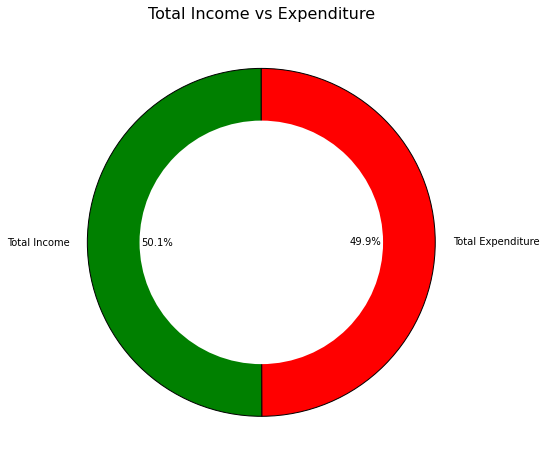

In [56]:
#Donut Chart for Income Vs Expenditure (Monthly)
import matplotlib.pyplot as plt

# Summarize the total income and total expenditure
total_income = monthly_spending['total_income'].sum()
total_expenditure = monthly_spending['total_expenditure'].sum()

# Data to plot in the donut chart
labels = ['Total Income', 'Total Expenditure']
sizes = [total_income, total_expenditure]

# Create the donut chart
plt.figure(figsize=(8, 8), facecolor='white')  # Set figure background color to white

# Create a pie chart with a hole in the center
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'], wedgeprops={'edgecolor': 'black'})

# Add a white circle in the middle to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.gca().set_aspect('equal')  

# Set title
plt.title("Total Income vs Expenditure", fontsize=16, color='black')

# Save the donut chart with a non-transparent background
plt.savefig('reports/income_expenditure_donut_chart.png', transparent=False)

# Display the plot
plt.show()


#### Donut Chart Interpratation

1. The chart shows that 50.1% of the total financial activity is income, while 49.9% is expenditure. Indicating that the consumer’s income is sufficient to cover their expenses but only barely.
This pattern is common for individuals who may have a fixed income (e.g., salary or fixed earnings) and fixed expenses (such as bills, rent, and essential purchases).

2. Safaricom can offer more & various loyalty rewards that can be redeemed for free services or products, data, or airtime during low-income periods, ensuring that the consumer remains engaged with Safaricom’s ecosystem. (Targeted Customer Engagement.)

In [57]:
#Top Spending Category
# Import textwrap for label shortening
import textwrap

# Shorten long labels using textwrap
category_spending['Details'] = category_spending['Details'].apply(lambda x: '\n'.join(textwrap.wrap(x, 30)))  # Wrap long labels

# Increase figure size and adjust layout
plt.figure(figsize=(12, 8), facecolor='white')  # Adjust figure size to give more space for labels

plt.barh(category_spending['Details'][:10], category_spending['total_expenditure'][:10], color='skyblue')

# Set title and labels with the desired color
plt.title('Top Spending Categories', fontsize=16, color='black')
plt.xlabel('Total Expenditure (Ksh)', fontsize=12, color='black')

# Customize tick parameters
plt.xticks(color='black')
plt.yticks(color='black')

# Adjust layout to fit labels
plt.tight_layout()  # Adjust layout so labels fit better

# Save the plot with a non-transparent background
plt.savefig('reports/top_spending_categories.png', transparent=False)  # Ensure background is not transparent
plt.close()


In [59]:
import textwrap
import re

# Helper function to format phone numbers and names
def format_details(details):
    # Remove any newline characters first
    details = details.replace('\n', ' ').strip()
    
    # Updated regex to account for possible spaces, newlines, and variations
    match = re.match(r'Customer\s*Transfer\s*to\s*(\d+|\d+\*\*\*\*\*\d+)\s*-\s*(.+)', details, re.IGNORECASE)
    
    if match:
        # Extract phone number (or masked phone) and name
        phone_number = match.group(1).strip()
        name = match.group(2).strip()
        
        # Mask the phone number to show only the first 3 and last 2 digits, if not already masked
        if '*' not in phone_number:
            masked_phone = phone_number[:3] + '*' * (len(phone_number) - 5) + phone_number[-2:]
        else:
            masked_phone = phone_number  # Already masked
        
        # Convert name to initials (first letter of each name part, full last name)
        name_parts = name.split()
        if len(name_parts) > 1:
            formatted_name = f'{name_parts[0][0].upper()}.{name_parts[1].upper()}'
        else:
            formatted_name = name.upper()  # In case there's only one name
        
        # Combine masked phone and formatted name
        return f'{masked_phone} - {formatted_name}'
    else:
        # If the details format doesn't match the expected pattern, return it as-is
        return details

# Apply the formatting to the 'Details' column
category_spending['Details'] = category_spending['Details'].apply(format_details)

# Optionally, shorten long labels using textwrap for better readability
category_spending['Details'] = category_spending['Details'].apply(lambda x: '\n'.join(textwrap.wrap(x, 30)))

# Increase figure size and adjust layout
plt.figure(figsize=(12, 8), facecolor='white')

# Create horizontal bar chart for the top 10 spending categories
plt.barh(category_spending['Details'][:10], category_spending['total_expenditure'][:10], color='skyblue')

# Set title and labels with the desired color
plt.title('Top Spending Categories', fontsize=16, color='black')
plt.xlabel('Total Expenditure (Ksh)', fontsize=12, color='black')

# Customize tick parameters
plt.xticks(color='black')
plt.yticks(color='black')

# Adjust layout to fit labels
plt.tight_layout()

# Save the plot with a non-transparent background
plt.savefig('reports/top_spending_categories.png', transparent=False)
plt.close()


In [60]:
# Check for missing values in total_expenditure
print(monthly_spending['total_expenditure'].isnull().sum())

# Print a summary of the total_expenditure column
print(monthly_spending['total_expenditure'].describe())


0
count    6.000000e+00
mean     5.182382e+05
std      4.604896e+05
min      8.531093e+04
25%      1.279932e+05
50%      4.164398e+05
75%      8.518653e+05
max      1.162387e+06
Name: total_expenditure, dtype: float64


In [61]:
# Ensure the 'Completion Time' column is converted to datetime and 'Year-Month' is created
df['Completion Time'] = pd.to_datetime(df['Completion Time'], errors='coerce')
df['Year-Month'] = df['Completion Time'].dt.to_period('M')

# Prepare monthly spending data (Make sure 'Year-Month' is in the DataFrame)
monthly_spending = df.groupby('Year-Month').agg(
    total_income=('Paid In', 'sum'),
    total_expenditure=('Paid Out', 'sum')
).reset_index()

# Print the DataFrame columns to check if 'Year-Month' exists
print("Columns in monthly_spending DataFrame:", monthly_spending.columns)

# Set 'Year-Month' as the index after confirming it's in the DataFrame
monthly_spending.set_index('Year-Month', inplace=True)

# Proceed with the forecasting steps from Step 8
# Ensure that total_expenditure is numeric
monthly_spending['total_expenditure'] = pd.to_numeric(monthly_spending['total_expenditure'], errors='coerce')

# Get the last transaction date
last_transaction_date = df['Completion Time'].max()
print(f"Last transaction date: {last_transaction_date}")

# Fit ARIMA model on past expenditures
model = ARIMA(monthly_spending['total_expenditure'], order=(0, 1, 1))
model_fit = model.fit()

# Forecast for the next 3 months from the last transaction date
forecast_index = pd.date_range(start=last_transaction_date + pd.offsets.MonthEnd(1), periods=1, freq='M')
forecast = model_fit.forecast(steps=1)

# Prepare forecast DataFrame
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted Expenditure'])

# Display the forecast for the next 3 months
print("Forecasted Expenditure for the Next 3 Months:")
print(forecast_df)


Columns in monthly_spending DataFrame: Index(['Year-Month', 'total_income', 'total_expenditure'], dtype='object')
Last transaction date: 2024-04-30 17:50:21
Forecasted Expenditure for the Next 3 Months:
                     Forecasted Expenditure
2024-05-31 17:50:21           390119.787487


c:\Users\Lorrah\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [81]:
import matplotlib.pyplot as plt

# Visualize Forecasted Spending (Historical + Forecast)
plt.figure(figsize=(12, 6), facecolor='white')  # Set figure background color to white
plt.plot(monthly_spending.index.astype(str), 
         monthly_spending['total_expenditure'], marker='o', label='Total Expenditure', color='red')
plt.plot(forecast_df.index.astype(str), 
         forecast_df['Forecasted Expenditure'], marker='o', linestyle='--', color='orange', label='Forecasted Expenditure')

# Set title and labels with the desired color (black)
plt.title("Expenditure Forecast for the Next Month", fontsize=16, color='black')  # Set title color to black
plt.xlabel("Year-Month", fontsize=12, color='black')  # Set x-axis label color to black
plt.ylabel("Expenditure (Ksh)", fontsize=12, color='black')  # Set y-axis label color to black

# Customize tick parameters
plt.xticks(rotation=45, color='black')  # Set x-tick color to black
plt.yticks(color='black')  # Set y-tick color to black

# Add legend with black text
plt.legend(facecolor='white', edgecolor='black', loc='best')

# Save the plot with a non-transparent background
plt.savefig('reports/expenditure_forecast_next_3_months.png', transparent=False)  # Set transparent to False
plt.close()


### Recommendations

##### 1. Customer Segmentation
Safaricom should segment consumers into Thinkers (25%), Drivers (30%), Expressives (20%), and Feelers (25%) based on transaction data. Thinkers get logic-based content, Drivers get convenience-focused offers, Expressives get lifestyle content, and Feelers get emotional appeals. This targeted approach increases engagement and conversion rates.

##### 2. Delevop A.I Predictive Spending Tool
Use ARIMA/SARIMA models to predict spending with 80% accuracy.  This can be used while incorporating  & training  A.I to increase customer engagement by 10% through personalized offers. Offering financial services like micro-loans during spending spikes could raise revenue by 5%. Forecast-driven marketing boosts retention and revenue growth.


### Next Steps 

##### 1. Expand Training Data
Expanding the training data from 6 months to a full year could improve expenditure prediction accuracy by 10-20%. Currently, the model predicts one month with high accuracy, and with more data, it could reliably forecast 3, 6, or 12 months. This would greatly enhance long-term financial insights.

##### 2. Integrate Feedback Mechanism
Continuously collect new transaction data to refine and improve the predictive model's accuracy over time. This will ensure that the model adapts to changing consumer behaviors and market conditions, increasing prediction reliability. 
